In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [138]:
from sklearn.datasets import load_boston
boston = load_boston()

In [139]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [140]:
bos_df = pd.DataFrame(boston.data)
bos_df.columns = boston.feature_names

In [144]:
X = bos_df.values
y = boston.target

In [146]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [154]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
def run_cases(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)
    for model in models:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring= 'neg_mean_absolute_error')
        print(str(model).split('(')[0] + 'Mean Absolute Error', abs(scores).mean())

In [156]:
#Not scaled features
run_cases(X, y)

LinearRegressionMean Absolute Error 3.309708001178341
RidgeMean Absolute Error 3.2958071316378663
LassoMean Absolute Error 3.580230192135791
ElasticNetMean Absolute Error 3.5338153492841355


In [157]:
#Scaled features
run_cases(X_scaled, y)

LinearRegressionMean Absolute Error 3.3097080011783504
RidgeMean Absolute Error 3.2978144833267016
LassoMean Absolute Error 3.6243263496192135
ElasticNetMean Absolute Error 3.719068685651873


In [150]:
from sklearn.model_selection import GridSearchCV
ridge_param = {'alpha':(0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 1.5)}
lasso_param = {'alpha':(0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 1.5)}
elstic_param = {'alpha':(0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 1.5), 
                'l1_ratio':(0, 0.25, 0.5, 0.75, 1.0)}

In [91]:

grid = GridSearchCV(models[1], ridge_param, cv=5, scoring = 'neg_mean_absolute_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': (0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 1.5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [120]:
results = grid.grid_scores_

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [121]:
params = []
scores = []
for score in results:
    print(score)
    mean = score[1]
    param = score[0]['alpha']
    scores.append(mean)
    params.append(param)

mean: -3.31063, std: 0.31239, params: {'alpha': 0.0001}
mean: -3.31058, std: 0.31244, params: {'alpha': 0.001}
mean: -3.31005, std: 0.31293, params: {'alpha': 0.01}
mean: -3.30607, std: 0.31743, params: {'alpha': 0.1}
mean: -3.29820, std: 0.33225, params: {'alpha': 0.5}
mean: -3.29672, std: 0.34198, params: {'alpha': 1.0}
mean: -3.29626, std: 0.34817, params: {'alpha': 1.5}


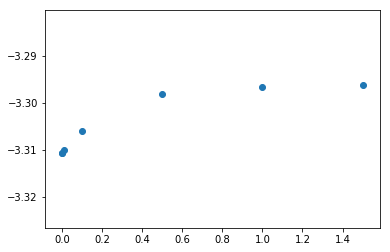

In [122]:
ax = plt.subplot(111)
ax.scatter(params, scores)

In [115]:
scores

[]